In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')


In [3]:
# import vader model data for visualization
train_vader = pd.read_csv("vaderText.csv")

In [27]:
train_vader.sample(15)

id                                              title  \
4387    4387  Motorcycling Without the Mansplaining - The Ne...   
10652  10652  Changing The Lives Of African Girls Starts Wit...   
17608  17608  Venezuela Casts a Long Shadow on Elections in ...   
7793    7793  Holocaust-Themed Ice Dance in Russia Draws Con...   
17242  17242  Hey, CANADIANS! Were you shocked by recent rep...   
7367    7367  Heroic Prego Advertisement Replaces Refreshed ...   
8403    8403  EgyptAir 804’s ‘Black Box’ Recovered in Medite...   
19549  19549  Tribute to the Last Honorable US Senator: The ...   
11299  11299     Breitbart News Daily: Paris Terror - Breitbart   
17891  17891  Fiat Chrysler Announces Recall of 1.1 Million ...   
19763  19763  Brother of Clinton’s Campaign Chair is an Acti...   
170      170    Remember This When You Talk About Standing Rock   
7906    7906  Trump Voter Arrested When Officials See What H...   
8727    8727  Ezekiel’s Wheel Ties African Spiritual Traditi...   
2717    2717  The Doubt Machine: Inside The Koch Brothers’ W...   

                                  author  \
4387                  Lily Brooks-Dalton   
10652                    Brianna Acuesta   
17608                     Raphael Minder   
7793   Ivan Nechepurenko and Sewell Chan   
17242                     BareNakedIslam   
7367                                       
8403       Nour Youssef and Nicola Clark   
19549                             Editor   
11299                     Breitbart News   
17891                        Bill Vlasic   
19763                     Claire Bernish   
170                                        
7906                Dom the Conservative   
8727                  John Noble Wilford   
2717                          Rowan Wolf   

                                                    text  label  compound  \
4387   We’re fresh over the Canadian border, in a sup...      0    0.9840   
10652  Bicycles are often taken for granted in the U....      1    0.0000   
17608  MADRID  —   Europe is facing a migration crisi...      0    0.9914   
7793   MOSCOW  —   Dressed as concentration camp inma...      0    0.6024   
17242  Christine t October 28, 2016 @ 2:59 pm \nWhy o...      1    0.2144   
7367   Hillary Clinton Waiting In Wings Of Stage Sinc...      1   -0.8689   
8403   CAIRO  —   The cockpit voice recorder from the...      0    0.5635   
19549  14th Anniversary of His Passing By Joachim Hag...      1   -0.9996   
11299  On the Friday edition of Breitbart News Daily,...      0   -0.8360   
17891  DETROIT  —   Fiat Chrysler said on Friday that...      0   -0.9804   
19763  Posted by Claire Bernish \nTony Podesta — brot...      1    0.9206   
170    Donate Remember This When You Talk About Stand...      1    0.9518   
7906   Share This A Trump supporter was arrested afte...      1   -0.9906   
8727     have long been among the country’s most ferv...      0    0.9734   
2717   [Photo: Before and after mountain top removal ...      1   -0.9947   

         neg    neu    pos  category  
4387   0.044  0.879  0.077  Positive  
10652  0.085  0.805  0.110   Neutral  
17608  0.091  0.788  0.122  Positive  
7793   0.112  0.767  0.122  Positive  
17242  0.028  0.916  0.056  Positive  
7367   0.081  0.855  0.064  Negative  
8403   0.039  0.911  0.050  Positive  
19549  0.149  0.791  0.061  Negative  
11299  0.052  0.937  0.011  Negative  
17891  0.115  0.814  0.071  Negative  
19763  0.084  0.819  0.097  Positive  
170    0.103  0.774  0.123  Positive  
7906   0.122  0.797  0.081  Negative  
8727   0.021  0.921  0.058  Positive  
2717   0.091  0.829  0.080  Negative

In [1]:
import plotly.express as px

In [7]:
# Vader Sentiment Visualization
def Sentiscore(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

train_vader['category'] = train_vader['compound'].apply(Sentiscore)

fig = px.scatter(train_vader, 
                x = 'pos',
                y = 'neg',
                color = 'category',
                hover_name = 'author')

fig.show()

In [12]:
fig = px.scatter_3d(train_vader, x='pos', y='neg', z='neu',
              color='category')
fig.show()

Text(0.5, 1.0, 'Compound Scores')

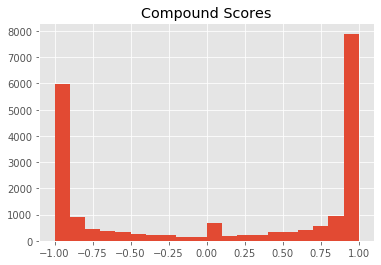

In [13]:
plt.hist(train_vader['compound'], bins=20)
plt.title("Compound Scores")

Text(0.5, 1.0, 'Positive Scores')

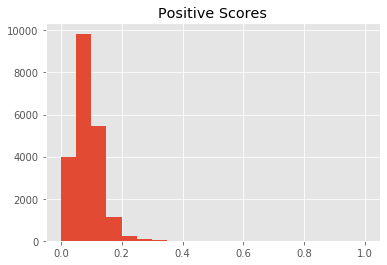

In [14]:
plt.hist(train_vader['pos'], bins=20)  
plt.title("Positive Scores")

Text(0.5, 1.0, 'Negative Scores')

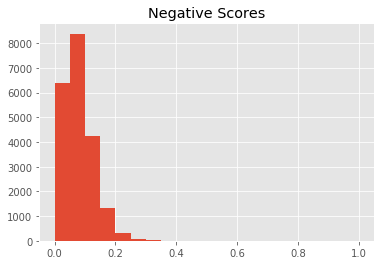

In [15]:
plt.hist(train_vader['neg'], bins=20)
plt.title("Negative Scores")

Text(0.5, 1.0, 'Neutral Scores')

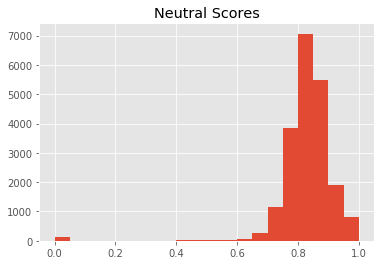

In [16]:
plt.hist(train_vader['neu'], bins=20)
plt.title("Neutral Scores")

Generating word cloud....
Making plot


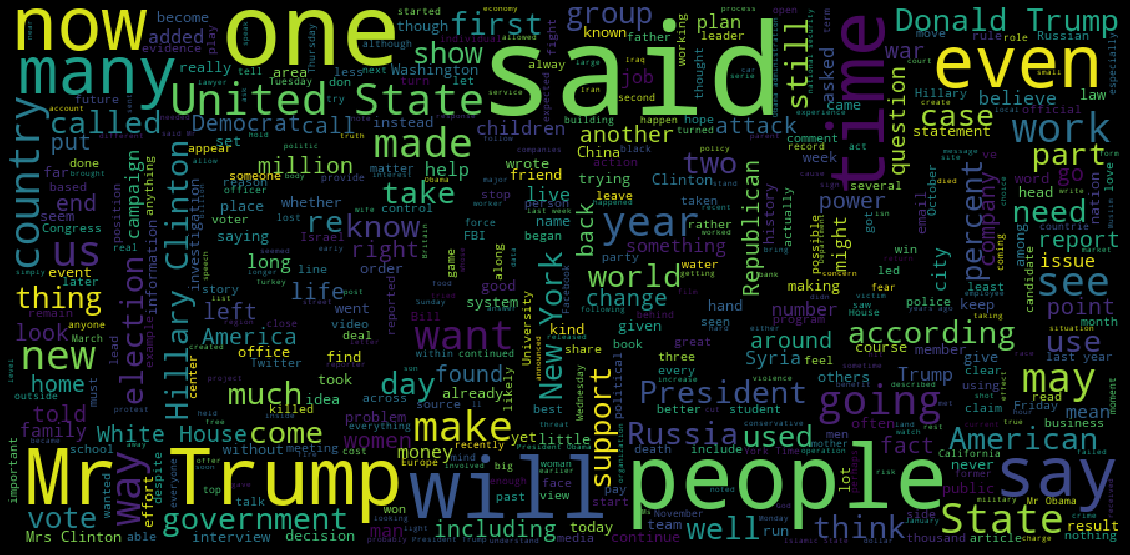

In [14]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator
# import image
char_mask = np.array(Image.open("IS424.png"))
image_colors = ImageColorGenerator(char_mask) # to recolor the word cloud to represent the colours from the image
# generate wordcloud
print('Generating word cloud....')
wc = WordCloud(background_color="black", max_words=500, width=1600, height=800,
mask=char_mask, random_state=1).generate(' '.join(train_vader['text'])) #max_words must be less than number of unique words in your data
    
print('Making plot')
plt.figure(figsize=(20,10))
ypos = 800
plt.style.use('dark_background')
plt.imshow(wc) #Shows the word cloud
plt.axis("off") 
plt.savefig('fakenewstext.png') #to save the figure into your system

Generating word cloud....
Making plot


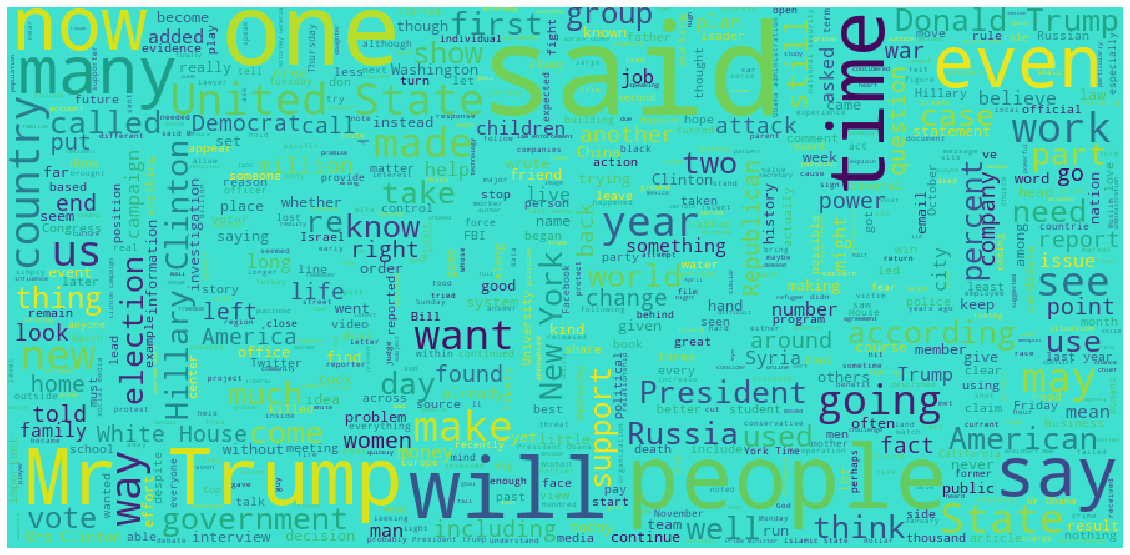

In [18]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator
# import image
char_mask = np.array(Image.open("IS424.png"))
image_colors = ImageColorGenerator(char_mask) # to recolor the word cloud to represent the colours from the image
# generate wordcloud
print('Generating word cloud....')
wc = WordCloud(background_color="turquoise", max_words=700, width=1600, height=800,
mask=char_mask, random_state=1).generate(' '.join(train_vader['text'])) #max_words must be less than number of unique words in your data
print('Making plot')
plt.figure(figsize=(20,10))
ypos = 800
plt.style.use('dark_background')
plt.imshow(wc) #Shows the word cloud
plt.axis("off") 
plt.savefig('fakenewstext1.png') #to save the figure into your system